In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 18 00:34:05 2019

@author: USER
"""
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

#Reading Data
df = pd.read_excel('Merged_pollution_dataset - wo 2016 17.xlsx')
df_bbsr = df[(df['City/Town/Village/Area'] == 'Bhubaneswar') | (df['City/Town/Village/Area'] == 'Bhubaneshwar')]

df_bbsr.dtypes

df_bbsr['RSPM/PM10'] = pd.to_numeric(df_bbsr['RSPM/PM10'], errors='coerce')
df_bbsr['SO2'] = pd.to_numeric(df_bbsr['SO2'], errors='coerce')
df_bbsr['NO2'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')
df_bbsr['SPM'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')

df_bbsr.dtypes

#Data Preprocessing
df_bbsr['Location of Monitoring Station'].replace('SPCB Building, Bhubaneshwar', 'OSPCB Bldg',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Capital Police Station, Bhubaneshwar', 'Capital Police Stn.',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('IRC Vilage, Bhubaneshwar', 'IRC',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Chandrasekharpur. Bhubneswar', 'Chandrasekharpur',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Water works, Palasuni, Bhubneswar', 'Palasuni',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Patrapada, Bhubneswar', 'Patrapada',inplace=True)

df_bbsr_cps = df_bbsr[(df_bbsr['Location of Monitoring Station'] == 'Capital Police Stn.')]

#Initial Analysis
#Checking the datatypes of various columns
df_bbsr_cps.dtypes

#Converting object to Datetime
df_bbsr_cps.reset_index(inplace = True)
df_bbsr_cps = df_bbsr_cps.drop(['index'], axis = 1)
df_bbsr_cps['Sampling Date'] = pd.to_datetime(df_bbsr_cps['Sampling Date'], format='%Y-%m-%d %H:%M')
df_bbsr_cps['Sampling Date'] = pd.to_datetime(df_bbsr_cps['Sampling Date'], format='%Y-%m-%d %H:%M')


df_bbsr_cps.dtypes

#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

print("SUCCESS!!")
df_bbsr_cps.head()

SUCCESS!!


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,SPM
0,NaN,2005-04-01,Orissa,Bhubaneshwar,Capital Police Stn.,Odisha State Pollution Control Board,Residential and others,NaN,21.0,172.0,21.0
1,NaN,2005-06-01,Orissa,Bhubaneshwar,Capital Police Stn.,Odisha State Pollution Control Board,Residential and others,NaN,20.0,126.0,20.0
2,NaN,2005-09-01,Orissa,Bhubaneshwar,Capital Police Stn.,Odisha State Pollution Control Board,Residential and others,NaN,16.0,132.0,16.0
3,NaN,2005-12-01,Orissa,Bhubaneshwar,Capital Police Stn.,Odisha State Pollution Control Board,Residential and others,NaN,25.0,125.0,25.0
4,NaN,2005-01-14,Orissa,Bhubaneshwar,Capital Police Stn.,Odisha State Pollution Control Board,Residential and others,NaN,14.0,140.0,14.0


In [2]:
#Index Sorting
df_bbsr_cps = df_bbsr_cps.set_index(df_bbsr_cps['Sampling Date'])
df_bbsr_cps = df_bbsr_cps.sort_index()
# plt.plot(df_bbsr_cps['NO2'])

#Separating Year, Month, Day and Day of Week
df_bbsr_cps['year'] = df_bbsr_cps['Sampling Date'].dt.year 
df_bbsr_cps['month'] = df_bbsr_cps['Sampling Date'].dt.month 
df_bbsr_cps['day'] = df_bbsr_cps['Sampling Date'].dt.day
df_bbsr_cps['day_of_week'] = df_bbsr_cps['Sampling Date'].dt.dayofweek

#Determining Weekend
def weekend(row):
    if (row == 5) or (row == 6):
        return 1
    else:
        return 0

df_bbsr_cps['weekend'] = df_bbsr_cps['day_of_week'].apply(weekend)

#Outlier Removal
mean_cps = df_bbsr_cps['SPM'].mean()
std_dev_cps = df_bbsr_cps['SPM'].std() #Standard Deviation of SPM

df_bbsr_cps['SPM'][df_bbsr_cps['SPM'] > (mean_cps + 2.5*std_dev_cps)] = np.nan   #Replacing Outlier with "nan"
plt.plot(df_bbsr_cps['SPM'])
df_bbsr_cps.isna().sum()

df_bbsr_cps['SPM'] = df_bbsr_cps['SPM'].fillna(method = 'backfill')   #Replacing "nan" with the previous values

#Dummy Encoding
df_bbsr_cps = pd.get_dummies( df_bbsr_cps, columns = ['month', 'day_of_week'] )

print("SUCCESS!!")

SUCCESS!!


In [3]:
#Creating Multi-features
xf = df_bbsr_cps[['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']]

xf.head()


,weekend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,SPM
Sampling Date,,,,,,,,,,,,,,,,,,,,,
2005-01-14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,14.0
2005-01-17,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,20.0
2005-01-20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,25.0
2005-01-22,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,21.0
2005-01-25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,29.0


In [4]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 100, 21

mean_spm = xf['SPM'].mean()
std_spm = xf['SPM'].std()

#Feature Scaling
cols = ['weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'SPM']

for field in cols:
    xf[field] = (xf[field] - xf[field].mean())/xf[field].std()


X, y = split_sequences(xf.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

X = np.delete(X, X.shape[0] - 1, 0)
y = np.delete(y, y.shape[0] - 1, 0)

# X = X.reshape(X.shape[0], X.shape[1], 1)
# y = y.reshape(y.shape[0], y.shape[1], 1)

n_features = X.shape[2]

print("SUCCESS!!")

SUCCESS!!


In [5]:
X.shape

(819, 100, 20)

In [6]:
from sklearn.externals import joblib 
model = joblib.load('F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_spm_CPS.pkl')

Using TensorFlow backend.


In [7]:
from numpy import array
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=2)
print((yhat[0]*std_spm)+mean_spm)
print((y_test*std_spm)+mean_spm)

[ 15.47620296  18.2730751   19.55395317  16.7198658   16.42943001
  14.6016283   17.53923035  20.11591721  14.55057144  18.66016769
  15.78243065  24.85684586  19.70660973  20.12069893  21.4264183
  14.92094326  21.17922592  20.6928215   22.05142403  21.41028786
  15.97465897]
[ 14.  19.  17.  18.  17.  15.  20.  18.  17.  19.  34.  18.  15.  18.  16.
  16.  20.  19.  20.  18.  21.]


In [8]:
X_test.shape

(100, 20)

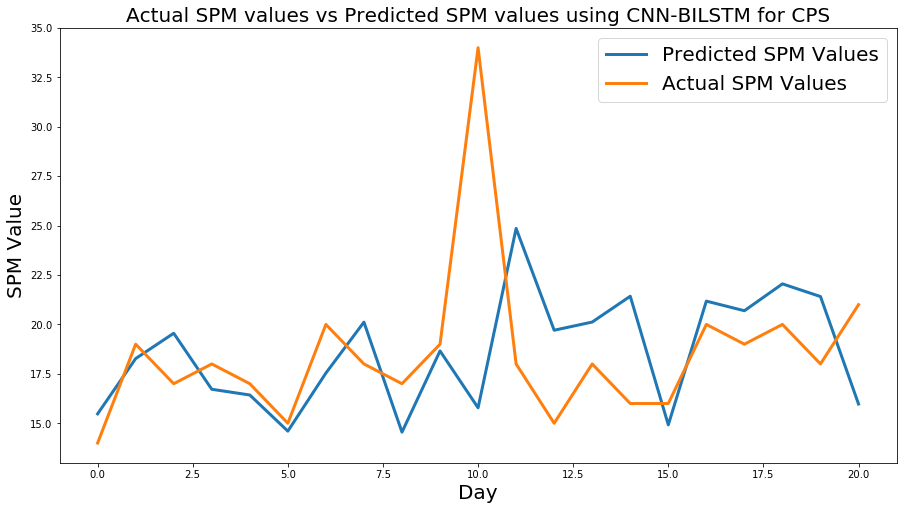

In [10]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM for CPS', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat[0]*std_spm)+mean_spm, label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test*std_spm)+mean_spm, label = 'Actual SPM Values',  linewidth=3)
plt.legend(loc = 'upper right',frameon=True,  prop={"size":20});
plt.show()

In [11]:
x_new = []

for inp_val in X:
  x_input_new = inp_val.reshape((1, n_steps_in, n_features))
  y_newpred = model.predict(x_input_new, verbose = 1)
  x_new.append(y_newpred)
  
x_new = array(x_new)

1/1 [==============================] - 0s 5ms/step


In [12]:
x_new1 = x_new[:, 0, :]
x_new1.shape

(819, 21)

In [13]:
print(x_new1.shape, y.shape)

(819, 21) (819, 21)


In [15]:
# from sklearn import svm
# from sklearn.svm import SVR

# svc = svm.SVC(kernel ='linear', C = 1).fit(x_ann_new, y)

# clf = SVR(C=1.0, epsilon=0.2)
# model_new = clf.fit(x_ann_new, y[:,0])

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

regr_multirf = MultiOutputRegressor(xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42))

#regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0))
regr_multirf.fit(x_new1, y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6),
           n_jobs=1)

In [15]:
from sklearn.externals import joblib 
path = "F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_SVR_CPS.pkl"  
# Save the model as a pickle in a file 
joblib.dump(regr_multirf, path)

['F:\\Weather Forecasting\\Swastik_project\\Models\\model_cnnbilstm_SVR_CPS.pkl']

In [16]:
regr_multirf = joblib.load('F:\Weather Forecasting\Swastik_project\Models\model_cnnbilstm_SVR_CPS.pkl')

In [16]:
y_test.shape
y_test_new = y_test.reshape(y_test.shape[0], -1)

y_test_new.shape
y_test

array([-0.87137183,  0.08150718, -0.29964443, -0.10906862, -0.29964443,
       -0.68079603,  0.27208298, -0.10906862, -0.29964443,  0.08150718,
        2.94014423, -0.10906862, -0.68079603, -0.10906862, -0.49022023,
       -0.49022023,  0.27208298,  0.08150718,  0.27208298, -0.10906862,
        0.46265879])

In [17]:
y_test_new = y_test_new.T
y_test_new

array([[-0.87137183,  0.08150718, -0.29964443, -0.10906862, -0.29964443,
        -0.68079603,  0.27208298, -0.10906862, -0.29964443,  0.08150718,
         2.94014423, -0.10906862, -0.68079603, -0.10906862, -0.49022023,
        -0.49022023,  0.27208298,  0.08150718,  0.27208298, -0.10906862,
         0.46265879]])

In [18]:
yhat_new = regr_multirf.predict(y_test_new)

In [19]:
print(yhat_new)
print(y_test_new)

[[-0.83067858  0.08915344 -0.33335197 -0.03149521 -0.35710055 -0.59960461
   0.27787316 -0.03940797 -0.28801     0.16992101  2.38201761  0.10121989
  -0.6222651  -0.11789668 -0.44232148 -0.45926952  0.20626569  0.08955237
   0.18589079  0.06311885  0.41625029]]
[[-0.87137183  0.08150718 -0.29964443 -0.10906862 -0.29964443 -0.68079603
   0.27208298 -0.10906862 -0.29964443  0.08150718  2.94014423 -0.10906862
  -0.68079603 -0.10906862 -0.49022023 -0.49022023  0.27208298  0.08150718
   0.27208298 -0.10906862  0.46265879]]


In [20]:
#Denormalization
y_test_new = (y_test_new[0]*std_spm)+mean_spm 
yhat_new = (yhat_new[0]*std_spm)+mean_spm

In [21]:
print(yhat_new)
print(y_test_new)

[ 14.21352768  19.04012299  16.82312775  18.40704727  16.69851303
  15.42603302  20.03038216  18.36552811  17.06104851  19.46393013
  31.07136726  19.10343742  15.307127    17.95367813  16.25133705
  16.16240692  19.6546402   19.04221535  19.54772758  18.90351295
  20.75648308]
[ 14.  19.  17.  18.  17.  15.  20.  18.  17.  19.  34.  18.  15.  18.  16.
  16.  20.  19.  20.  18.  21.]


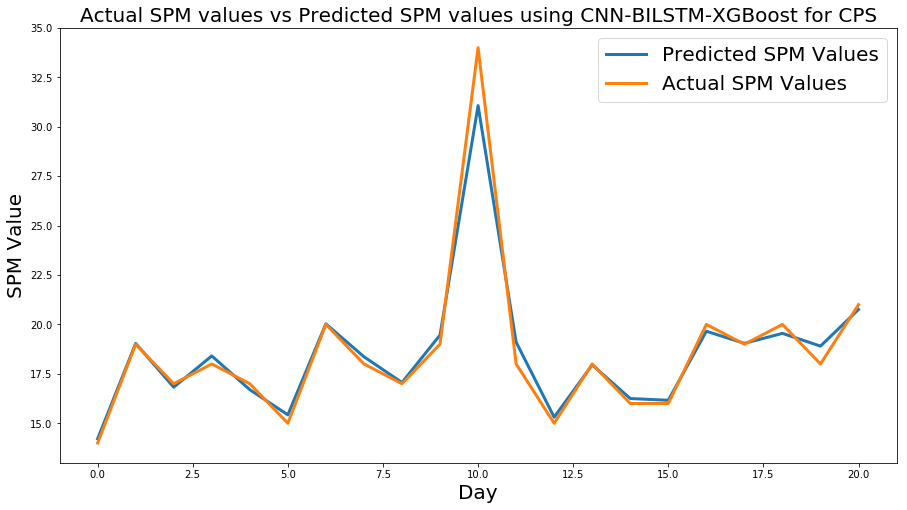

In [22]:
# fig, ax = plt.subplots()
plt.title('Actual SPM values vs Predicted SPM values using CNN-BILSTM-XGBoost for CPS', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('SPM Value', fontsize = 20)
plt.plot((yhat_new), label = 'Predicted SPM Values', linewidth=3)
plt.plot((y_test_new), label = 'Actual SPM Values', linewidth=3)
plt.legend(loc = 'upper right',frameon=True,  prop={"size":20});
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new, yhat_new))
print(rms_new)

mse_new = mean_squared_error(y_test_new, yhat_new)
print(mse_new)

mae_new = mean_absolute_error(y_test_new, yhat_new)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new, yhat_new)
print(mape_new)

0.7575584397636005
0.573894789657
0.441529501052
2.12663667867


In [24]:
import csv
with open('cnn_bilstm_xgboost_cps.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter = ',')
    writer.writerow(y_test_new)
    writer.writerow(yhat_new)